<h2>Plotting for Exploratory data analysis for Haberman Cancer Survival </h2>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# the dataset is from https://www.kaggle.com/gilsousa/habermans-survival-data-set
# load the csv dataset in dataframe
data = pd.read_csv("haberman.csv")

In [3]:
# feature and datapoints
haberman.shape

(306, 4)

In [4]:
# what are the columns
print(haberman.columns)

Index(['Age', 'Year', 'No.of Pos Axillary nodes', 'Survival Status'], dtype='object')


In [7]:
data.head()

,Age,Year,No.of Pos Axillary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
data.describe()

,Age,Year,No.of Pos Axillary nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
#Attribute Information:
#Age of patient at time of operation (numerical)
#Patient's year of operation (year - 1900, numerical)
#Number of positive axillary nodes detected (numerical)
#Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
#Missing Attribute Values: None

# Let's calculate each type of case's
data["Survival Status"].value_counts()


1    225
2     81
Name: Survival Status, dtype: int64

In [10]:
# 225 - lived more than 5 years
# 81 - lived less than 5 years


<h3>This is unbalance dataset</h3>

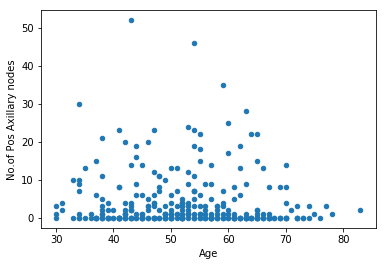

In [12]:
#2-D scatter plot:

data.plot(kind="scatter", x="Age", y="No.of Pos Axillary nodes")

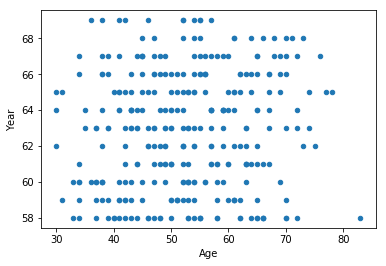

In [13]:
#2-D scatter plot-

data.plot(kind="scatter", x="Age", y="Year")

<h3>The above 2 plot is useless as it doesn't make much sense.</h3>

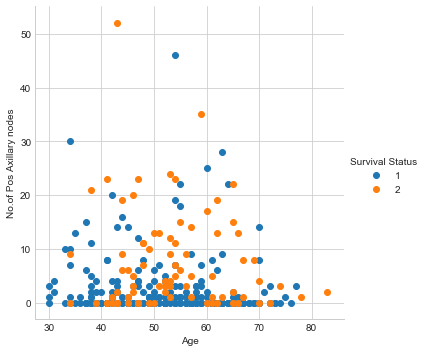

In [14]:
#Let's plot with some diffrent color with distinguis property and its color
# Seaborne
sns.set_style("whitegrid") # plot will contain some grid

sns.FacetGrid(data, hue="Survival Status", size=5)\
.map(plt.scatter,"Age", "No.of Pos Axillary nodes")\
.add_legend();
plt.show()


<h3>Its hard to classigy the feature from the above plot.<h3>

<h3>Pair wise plot : 3C2 = 6 plot { (Age,year ),(Age,No.of Pos Axillary nodes ),(No.of Pos Axillary nodes,year )}</h3> 

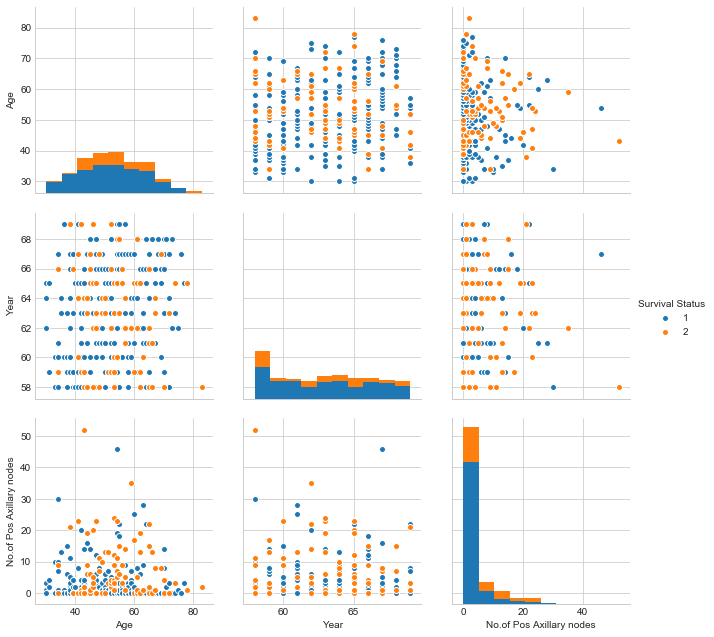

In [15]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,hue="Survival Status",size=3, vars=["Age","Year","No.of Pos Axillary nodes"]);
plt.show()

In [26]:
# Their are 3C2 combination,but this is not enough to disnguish the status

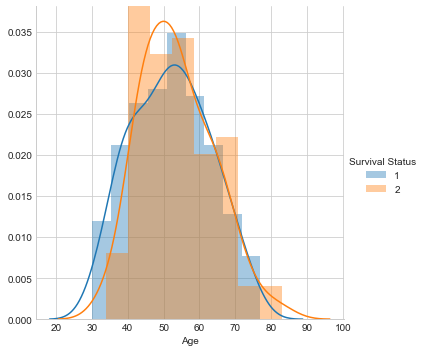

In [16]:
# We can use PDF, it is plot for univarianct based on frequency
sns.FacetGrid(data, hue="Survival Status",size=5)\
    .map(sns.distplot, "Age")\
    .add_legend();
plt.show();    



Observation : When Age < 35, high chances to survive
              When Age > 75, less chances of survive  

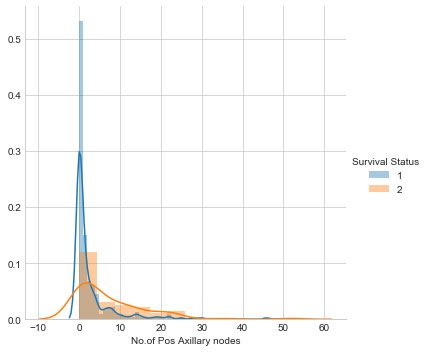

In [31]:
sns.FacetGrid(haberman, hue="Survival Status",size=5)\
    .map(sns.distplot, "No.of Pos Axillary nodes")\
    .add_legend();
plt.show();    


In [ ]:
Observation : The survival of a person is more when Positive Aux Nodes are negative i.e. less nodes are provided.
    When  Positive Aux Nodes = 0, the survival status is maximum

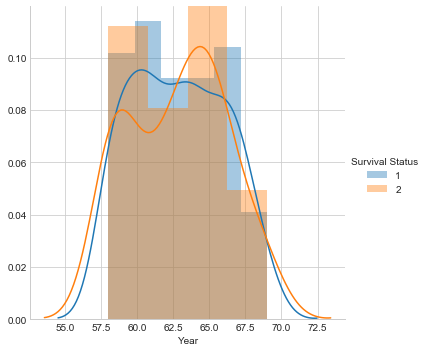

In [17]:
sns.FacetGrid(data, hue="Survival Status",size=5)\
    .map(sns.distplot, "Year")\
    .add_legend();
plt.show(); 

In [56]:
# We don't get much idea so far
# Let's caclucalte the mean and see if we can get any help from there

In [18]:
#Let's make 2 category for Survival Status
person_who_live_more_than_five_years = data[data['Survival Status'] == 1]
person_who_dont_live_more_than_five_years = data[data['Survival Status'] == 2]


In [19]:
person_who_live_more_than_five_years.describe()

,Age,Year,No.of Pos Axillary nodes,Survival Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [20]:
person_who_dont_live_more_than_five_years.describe()

,Age,Year,No.of Pos Axillary nodes,Survival Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [21]:
# We will can observe that No.of Pos Axillary nodes play a big role
#mean 2.791111 - 7.456790 and std 5.870318 - 9.185654

In [22]:
#Lets caculate PDF and CDF

In [23]:
counts, bin_edges = np.histogram(person_who_live_more_than_five_years["No.of Pos Axillary nodes"], bins = 20, density= True)

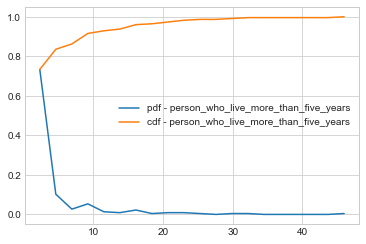

In [24]:
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf - person_who_live_more_than_five_years')
plt.plot(bin_edges[1:],cdf,label = 'cdf - person_who_live_more_than_five_years')
plt.legend()

<h3>Observation : If No.of Pos Axillary nodes < 5 , probability of living more 5 years is 0.7 </h3>
            

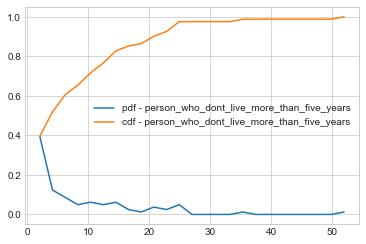

In [25]:
counts, bin_edges = np.histogram(person_who_dont_live_more_than_five_years["No.of Pos Axillary nodes"], bins = 25, density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf - person_who_dont_live_more_than_five_years')
plt.plot(bin_edges[1:],cdf,label = 'cdf - person_who_dont_live_more_than_five_years')
plt.legend()

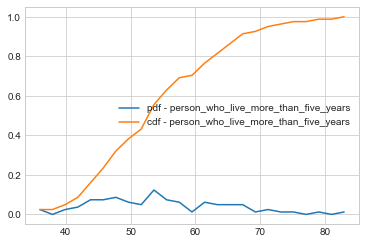

In [26]:
counts, bin_edges = np.histogram(person_who_dont_live_more_than_five_years["Age"], bins = 25, density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf - person_who_live_more_than_five_years')
plt.plot(bin_edges[1:],cdf,label = 'cdf - person_who_live_more_than_five_years')
plt.legend()

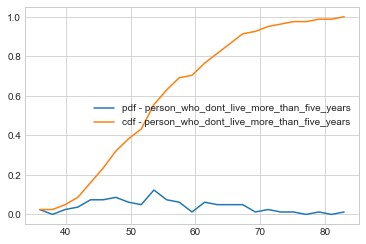

In [27]:
counts, bin_edges = np.histogram(person_who_dont_live_more_than_five_years["Age"], bins = 25, density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf - person_who_dont_live_more_than_five_years')
plt.plot(bin_edges[1:],cdf,label = 'cdf - person_who_dont_live_more_than_five_years')
plt.legend()

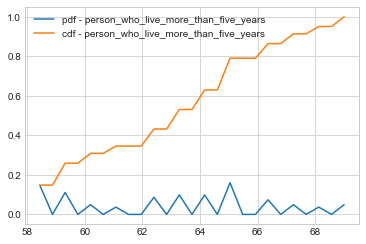

In [28]:
counts, bin_edges = np.histogram(person_who_dont_live_more_than_five_years["Year"], bins = 25, density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf - person_who_live_more_than_five_years')
plt.plot(bin_edges[1:],cdf,label = 'cdf - person_who_live_more_than_five_years')
plt.legend()

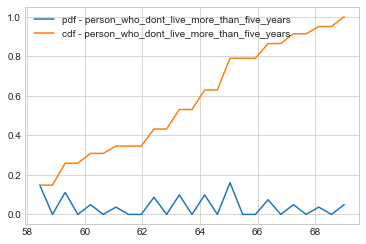

In [31]:
counts, bin_edges = np.histogram(person_who_dont_live_more_than_five_years["Year"], bins = 25, density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf - person_who_dont_live_more_than_five_years')
plt.plot(bin_edges[1:],cdf,label = 'cdf - person_who_dont_live_more_than_five_years')
plt.legend()

<h3>Observation : No.of Pos Axillary nodes play important role for person survival for more than 5 years </h3>
